In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('train.csv')

In [75]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [77]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [78]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

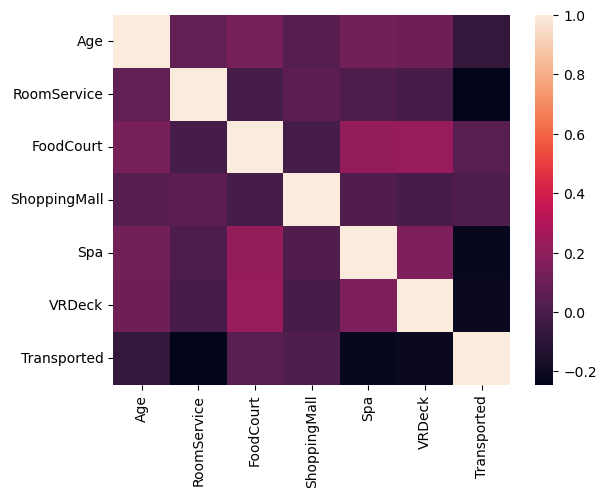

In [79]:
sns.heatmap(df_train.corr(numeric_only=True))

In [80]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [81]:
df_train['HomePlanet'].value_counts()
# One-hot encode 100%

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [82]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['HomePlanet'], drop_first=True, prefix='HomePlanet', dtype=int)], axis=1)

In [83]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Destination'], drop_first=True, prefix='Destination', dtype=int)], axis=1)

In [84]:
# df_train = pd.concat([df_train, df_train['Cabin'].str.split('/', expand=True)], axis=1)

In [85]:
to_drop = ['PassengerId', 'HomePlanet', 'Destination', 'Cabin', 'Name']
df_train = df_train.drop(to_drop, axis=1)

In [86]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [87]:
df_train.isna().sum()

CryoSleep                    217
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

In [101]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns = ['CryoSleep', 'VIP']

numerical_transformer = Pipeline([
    ('minmax_scaler', MinMaxScaler()),
    ('mean_imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
])

transformer = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_columns),
    ('categorical', categorical_transformer, categorical_columns)
])

df_transformed = pd.concat([df_train, pd.DataFrame(transformer.fit_transform(df_train))], axis=1)

In [104]:
df_transformed = df_transformed.drop(numerical_columns + categorical_columns, axis=1)

In [105]:
df_transformed

,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,0,1,2,3,4,5,6,7
0,False,1,0,0,1,0.493671,0.0,0.0,0.0,0.0,0.0,False,False
1,True,0,0,0,1,0.303797,0.007608,0.000302,0.001064,0.0245,0.001823,False,False
2,False,1,0,0,1,0.734177,0.003001,0.119948,0.0,0.29967,0.00203,False,True
3,False,1,0,0,1,0.417722,0.0,0.043035,0.015793,0.148563,0.007997,False,False
4,True,0,0,0,1,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,1,0,0,0,0.518987,0.0,0.228726,0.0,0.073322,0.003066,False,True
8689,False,0,0,1,0,0.227848,0.0,0.0,0.0,0.0,0.0,True,False
8690,True,0,0,0,1,0.329114,0.0,0.0,0.079687,0.000045,0.0,False,False
8691,False,1,0,0,0,0.405063,0.0,0.035186,0.0,0.015753,0.134049,False,False


In [112]:
from sklearn.model_selection import train_test_split

X, y = df_transformed.drop('Transported', axis=1), df_transformed['Transported']
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
accuracy_score(y_test, model.predict(X_test))

0.7745830937320299

In [129]:
df_test = pd.read_csv('test.csv')

In [130]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [131]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['HomePlanet'], drop_first=True, prefix='HomePlanet', dtype=int)], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Destination'], drop_first=True, prefix='Destination', dtype=int)], axis=1)
passengerids = df_test['PassengerId']
to_drop = ['PassengerId', 'HomePlanet', 'Destination', 'Cabin', 'Name']
df_test = df_test.drop(to_drop, axis=1)
df_test = pd.concat([df_test, pd.DataFrame(transformer.fit_transform(df_test))], axis=1)
df_test = df_test.drop(numerical_columns + categorical_columns, axis=1)
df_test.columns = df_test.columns.astype(str)

In [ ]:
df_test.head()

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,0,1,2,3,4,5,6,7
0,0,0,0,1,0.341772,0.0,0.0,0.0,0.0,0.0,True,False
1,0,0,0,1,0.240506,0.0,0.000356,0.0,0.14226,0.0,False,False
2,1,0,0,0,0.392405,0.0,0.0,0.0,0.0,0.0,True,False
3,1,0,0,1,0.481013,0.0,0.263206,0.0,0.009121,0.026266,False,False
4,0,0,0,1,0.253165,0.000865,0.0,0.07658,0.0,0.0,False,False


In [133]:
pd.concat([pd.DataFrame(passengerids, columns=['PassengerId']), pd.DataFrame(model.predict(df_test), columns=['Transported'])], axis=1).set_index('PassengerId').to_csv('submission.csv')